# Clean up your data and open it using Python and Pandas

In [1]:
import pandas as pd
pd.read_csv?

In [2]:
df = pd.DataFrame({'1stcolumn':[100,200], '2ndcolumn':[10,20]}) # example dataframe
print('With the old column names: \n') 
print(df)

df.columns = ['FirstColumn', 'SecondColumn'] # renames
print('\n\nWith the new column names:\n')
print(df)

With the old column names: 

   1stcolumn  2ndcolumn
0        100         10
1        200         20


With the new column names:

   FirstColumn  SecondColumn
0          100            10
1          200            20


# Matplotlib package

   record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   

   weight  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  


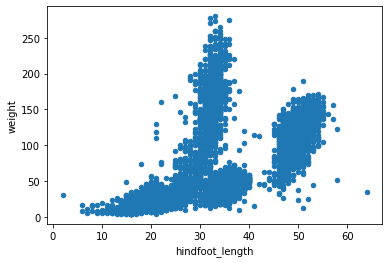

In [3]:
import matplotlib.pyplot as plt

surveys = pd.read_csv("data/surveys.csv")
my_plot = surveys.plot("hindfoot_length", "weight", kind="scatter")

print(surveys.head())
plt.show()

In [4]:
%matplotlib inline

(array([  1.,   3.,  23.,  62., 158., 239., 256., 162.,  68.,  28.]),
 array([-0.3975107 , -0.33172257, -0.26593445, -0.20014632, -0.1343582 ,
        -0.06857007, -0.00278195,  0.06300618,  0.1287943 ,  0.19458243,
         0.26037055]),
 <BarContainer object of 10 artists>)

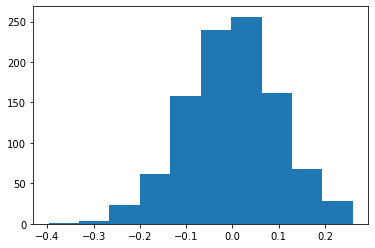

In [5]:
import numpy as np
sample_data = np.random.normal(0, 0.1, 1000)

plt.hist(sample_data)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.06876786, 0.16876786, 0.26876786, 0.36876786, 0.46876786,
        0.56876786, 0.66876786, 0.76876786, 0.86876786, 0.96876786,
        1.06876786]),
 <BarContainer object of 10 artists>)

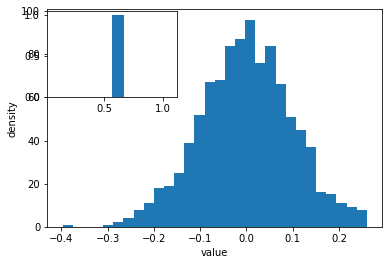

In [6]:
fig, ax1 = plt.subplots()
ax1.hist(sample_data, 30)

# Add a plot of a Beta distribution
a = 15
b = 10
beta_draws = np.random.beta(a, b)

# Adapt the lables
ax1.set_ylabel('density')
ax1.set_xlabel('value')

# Add additional axes to the figure
ax2 = fig.add_axes([0.125, 0.575, 0.3, 0.3])
# ax2 = fig.add_axes([left, bottom, width, height])
ax2.hist(beta_draws)



# Link matplotlib, Pandas and plotnine

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

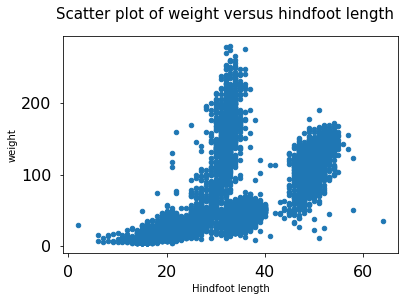

In [7]:
fig, ax1= plt.subplots() # prepare a matplotlib figure

surveys.plot("hindfoot_length", "weight", kind="scatter", ax=ax1)

# Provide further adaptations with matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize = 16, pad=8)
fig.suptitle("Scatter plot of weight versus hindfoot length", fontsize = 15)

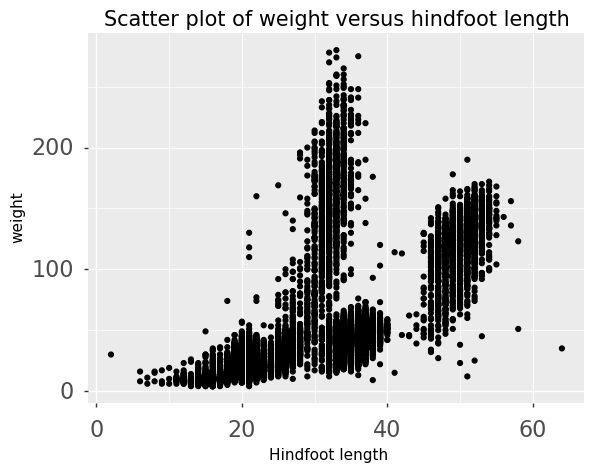

In [8]:
import plotnine as p9

surveys_narm = surveys.dropna(subset=['hindfoot_length', 'weight'])

myplot = (p9.ggplot(data = surveys_narm, mapping = p9.aes(x='hindfoot_length', y='weight')) + 
          p9.geom_point())

# convert output plotnine to a matplotlib obj
my_plt_version = myplot.draw()

# Provide further adaptation with matplotlib:
p9_ax = my_plt_version.axes[0] # each subplot is an item in a list
p9_ax.set_xlabel("Hindfoot length")
p9_ax.tick_params(labelsize=16, pad=8)
p9_ax.set_title("Scatter plot of weight versus hindfoot length", fontsize = 15)
plt.show()


Text(0.5, 1.0, 'Front Range flood event 2013')

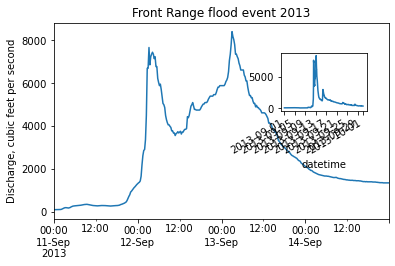

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

discharge = pd.read_csv("data/bouldercreek_09_2013.txt", 
                       skiprows=27, delimiter='\t', 
                       header=None )
discharge.columns = ['agency', 'site_id', 'datetime', 'timezone', 'flow_rate', 'discharge_cd']
discharge['datetime'] = pd.to_datetime(discharge['datetime'])

# data between september 11 and september 15, 2013
flood = discharge[(discharge["datetime"] >= "2013-09-11") & (discharge["datetime"] < "2013-09-15")]

fig, ax = plt.subplots()
ax2 = fig.add_axes([0.65, 0.575, 0.2, 0.2])

flood.head()
flood.plot(x="datetime", y="flow_rate", ax = ax, legend=False)
discharge.plot(x="datetime", y="flow_rate", ax=ax2)
ax2.legend().set_visible(False)

ax.set_xlabel("")
ax.set_ylabel("Discharge, cubic feet per second")
ax.legend().set_visible(False)
ax.set_title("Front Range flood event 2013")

In [10]:
fig.savefig("my_plot_name.pdf", dpi=300)

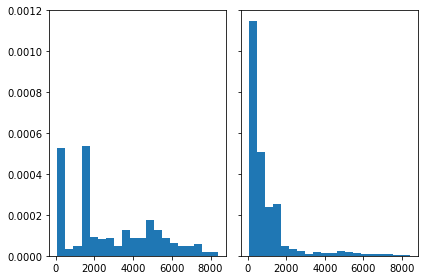

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

N_points = 100000
n_bins = 20

# Generate two normal distributions
dist1 = flood['flow_rate']
dist2 = discharge['flow_rate']

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins, density=True)
axs[1].hist(dist2, bins=n_bins, density=True)
# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)


In [12]:
import sqlite3

# Created a SQL connection to our SQLite database
con = sqlite3.connect("data/portal_mammals.sqlite")

cur = con.cursor()

# Check the table names in the SQL
res = cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res.fetchall():
    print(name[0])

selected_tbl =  cur.execute("SELECT * FROM surveys;")
names = list(map(lambda x: x[0], selected_tbl.description))
print(names)
    
for row in cur.execute("SELECT * FROM species;"):
    print(row)

# Be sure to close connection
con.close()

surveys
species
plots
['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex', 'hindfoot_length', 'weight']
(1, 7, 16, 1977, 2, 'NL', 'M', 32.0, None)
(2, 7, 16, 1977, 3, 'NL', 'M', 33.0, None)
(3, 7, 16, 1977, 2, 'DM', 'F', 37.0, None)
(4, 7, 16, 1977, 7, 'DM', 'M', 36.0, None)
(5, 7, 16, 1977, 3, 'DM', 'M', 35.0, None)
(6, 7, 16, 1977, 1, 'PF', 'M', 14.0, None)
(7, 7, 16, 1977, 2, 'PE', 'F', None, None)
(8, 7, 16, 1977, 1, 'DM', 'M', 37.0, None)
(9, 7, 16, 1977, 1, 'DM', 'F', 34.0, None)
(10, 7, 16, 1977, 6, 'PF', 'F', 20.0, None)
(11, 7, 16, 1977, 5, 'DS', 'F', 53.0, None)
(12, 7, 16, 1977, 7, 'DM', 'M', 38.0, None)
(13, 7, 16, 1977, 3, 'DM', 'M', 35.0, None)
(14, 7, 16, 1977, 8, 'DM', None, None, None)
(15, 7, 16, 1977, 6, 'DM', 'F', 36.0, None)
(16, 7, 16, 1977, 4, 'DM', 'F', 36.0, None)
(17, 7, 16, 1977, 3, 'DS', 'F', 48.0, None)
(18, 7, 16, 1977, 2, 'PP', 'M', 22.0, None)
(19, 7, 16, 1977, 4, 'PF', None, None, None)
(20, 7, 17, 1977, 11, 'DS', 'F', 48.0, None)
(21, 

(1077, 7, 8, 1978, 4, 'DS', 'M', 50.0, 130.0)
(1078, 7, 8, 1978, 15, 'PP', 'F', 23.0, 10.0)
(1079, 7, 8, 1978, 18, 'DS', 'M', 50.0, 106.0)
(1080, 7, 8, 1978, 14, 'DM', 'F', 36.0, 39.0)
(1081, 7, 8, 1978, 14, 'NL', 'M', 33.0, 113.0)
(1082, 7, 8, 1978, 1, 'DM', 'F', 38.0, 45.0)
(1083, 7, 8, 1978, 3, 'NL', 'F', 34.0, 115.0)
(1084, 7, 8, 1978, 4, 'DM', 'F', 36.0, 36.0)
(1085, 7, 8, 1978, 18, 'DM', 'M', 36.0, 24.0)
(1086, 7, 8, 1978, 14, 'DS', 'F', 51.0, 120.0)
(1087, 7, 8, 1978, 3, 'NL', 'M', 34.0, 190.0)
(1088, 7, 8, 1978, 14, 'PP', 'M', 23.0, 10.0)
(1089, 7, 8, 1978, 16, 'DM', 'M', 38.0, 48.0)
(1090, 7, 8, 1978, 18, 'DM', 'F', 35.0, 29.0)
(1091, 7, 8, 1978, 18, 'DS', 'F', 51.0, 131.0)
(1092, 7, 8, 1978, 13, 'DM', 'F', 36.0, 34.0)
(1093, 7, 8, 1978, 1, 'DS', 'M', 51.0, 101.0)
(1094, 7, 8, 1978, 18, 'DM', 'F', 34.0, 37.0)
(1095, 7, 8, 1978, 5, 'DM', 'F', 36.0, 47.0)
(1096, 7, 8, 1978, 5, 'DS', 'M', 52.0, 133.0)
(1097, 7, 8, 1978, 1, 'DS', 'M', 51.0, 63.0)
(1098, 7, 8, 1978, 16, 'DM', 'M', 

(1943, 7, 25, 1979, 17, 'OT', 'F', 20.0, 25.0)
(1944, 7, 25, 1979, 16, None, None, None, None)
(1945, 7, 26, 1979, 4, 'DS', 'M', 49.0, 108.0)
(1946, 7, 26, 1979, 15, 'PP', 'F', 22.0, 16.0)
(1947, 7, 26, 1979, 9, 'DM', 'F', 34.0, 44.0)
(1948, 7, 26, 1979, 15, 'PP', 'F', 20.0, 17.0)
(1949, 7, 26, 1979, 4, 'DM', 'F', 36.0, 44.0)
(1950, 7, 26, 1979, 3, 'OL', 'F', 20.0, 31.0)
(1951, 7, 26, 1979, 5, 'DM', 'M', 35.0, 40.0)
(1952, 7, 26, 1979, 3, 'OL', 'M', 20.0, 35.0)
(1953, 7, 26, 1979, 15, 'PP', 'F', 21.0, 11.0)
(1954, 7, 26, 1979, 15, 'PP', 'F', 20.0, 11.0)
(1955, 7, 26, 1979, 6, 'DS', 'F', 48.0, 59.0)
(1956, 7, 26, 1979, 9, 'DS', 'M', 48.0, 94.0)
(1957, 7, 26, 1979, 9, 'DS', 'M', 50.0, 68.0)
(1958, 7, 26, 1979, 4, 'DS', 'F', 51.0, 111.0)
(1959, 7, 26, 1979, 4, 'DM', 'F', 34.0, 23.0)
(1960, 7, 26, 1979, 10, None, None, None, None)
(1961, 8, 21, 1979, 13, 'OT', 'M', 20.0, 20.0)
(1962, 8, 21, 1979, 13, 'OL', 'F', 20.0, 45.0)
(1963, 8, 21, 1979, 24, 'DS', 'F', 50.0, 124.0)
(1964, 8, 21, 1979,

(2743, 3, 9, 1980, 9, 'DM', 'F', None, 44.0)
(2744, 3, 9, 1980, 18, 'DO', 'M', None, 45.0)
(2745, 3, 9, 1980, 24, 'DM', 'F', None, 39.0)
(2746, 3, 21, 1980, 12, 'DS', 'M', None, 134.0)
(2747, 3, 21, 1980, 10, 'OL', 'F', None, 42.0)
(2748, 3, 21, 1980, 17, 'OL', 'M', None, 35.0)
(2749, 3, 21, 1980, 17, 'DM', 'M', None, 48.0)
(2750, 3, 21, 1980, 9, 'DM', 'M', None, 47.0)
(2751, 3, 21, 1980, 12, 'NL', 'M', None, 97.0)
(2752, 3, 21, 1980, 17, 'OL', 'F', None, 40.0)
(2753, 3, 21, 1980, 1, 'PF', 'F', 14.0, 7.0)
(2754, 3, 21, 1980, 21, 'RM', 'F', None, 5.0)
(2755, 3, 21, 1980, 19, 'RM', 'F', None, 13.0)
(2756, 3, 21, 1980, 12, 'DM', 'F', None, 51.0)
(2757, 3, 21, 1980, 8, 'DM', 'M', None, 44.0)
(2758, 3, 21, 1980, 12, 'RM', 'F', None, None)
(2759, 3, 21, 1980, 19, 'RM', 'F', None, 12.0)
(2760, 3, 21, 1980, 21, 'PF', 'M', None, None)
(2761, 3, 21, 1980, 11, 'DM', 'F', 34.0, 45.0)
(2762, 3, 21, 1980, 17, 'DS', 'M', None, 160.0)
(2763, 3, 21, 1980, 9, 'DS', 'F', 45.0, 61.0)
(2764, 3, 21, 1980, 1

(3452, 11, 9, 1980, 1, 'DS', 'M', 52.0, 145.0)
(3453, 11, 9, 1980, 2, 'DO', 'M', 35.0, 50.0)
(3454, 11, 9, 1980, 2, 'DM', 'F', 35.0, 38.0)
(3455, 11, 9, 1980, 2, 'DO', 'F', 36.0, 53.0)
(3456, 11, 9, 1980, 2, 'DM', 'F', 36.0, 45.0)
(3457, 11, 9, 1980, 2, 'DS', 'M', 51.0, 146.0)
(3458, 11, 9, 1980, 3, 'DM', 'M', 37.0, 45.0)
(3459, 11, 9, 1980, 3, 'OT', 'F', 19.0, 20.0)
(3460, 11, 9, 1980, 3, 'DM', 'M', 36.0, 48.0)
(3461, 11, 9, 1980, 3, 'OT', 'F', 20.0, 28.0)
(3462, 11, 9, 1980, 4, 'DS', 'M', None, 121.0)
(3463, 11, 9, 1980, 4, 'DM', 'F', 35.0, 39.0)
(3464, 11, 9, 1980, 4, 'DM', 'M', 36.0, 43.0)
(3465, 11, 9, 1980, 4, 'DM', 'M', 37.0, 46.0)
(3466, 11, 9, 1980, 5, 'DS', 'F', 51.0, 129.0)
(3467, 11, 9, 1980, 5, 'DS', 'F', 48.0, 106.0)
(3468, 11, 9, 1980, 6, 'DM', 'F', 34.0, 40.0)
(3469, 11, 9, 1980, 6, 'DS', 'F', 50.0, 124.0)
(3470, 11, 9, 1980, 6, 'DM', 'F', 36.0, 46.0)
(3471, 11, 9, 1980, 6, 'DS', 'F', 50.0, 111.0)
(3472, 11, 9, 1980, 6, 'DS', 'F', 47.0, 104.0)
(3473, 11, 9, 1980, 9, 'DS

(4342, 4, 6, 1981, 4, 'DS', 'M', None, 125.0)
(4343, 4, 6, 1981, 6, 'DO', 'F', None, 52.0)
(4344, 4, 6, 1981, 11, 'DM', 'M', None, 48.0)
(4345, 4, 6, 1981, 13, 'DS', 'M', None, 137.0)
(4346, 4, 6, 1981, 24, 'DM', 'M', None, 49.0)
(4347, 4, 6, 1981, 2, 'DM', 'F', None, 34.0)
(4348, 4, 6, 1981, 11, 'DS', 'M', None, 117.0)
(4349, 4, 6, 1981, 13, 'DM', 'M', None, 46.0)
(4350, 4, 6, 1981, 8, 'DS', 'M', None, 84.0)
(4351, 4, 6, 1981, 11, 'DM', 'M', None, 21.0)
(4352, 4, 6, 1981, 13, 'DS', 'F', None, 110.0)
(4353, 4, 6, 1981, 7, None, None, None, None)
(4354, 4, 6, 1981, 10, None, None, None, None)
(4355, 5, 3, 1981, 10, 'SA', None, None, None)
(4356, 5, 3, 1981, 12, 'DO', 'M', 36.0, 40.0)
(4357, 5, 3, 1981, 21, 'PF', 'M', 14.0, 7.0)
(4358, 5, 3, 1981, 10, 'OL', 'M', 21.0, 41.0)
(4359, 5, 3, 1981, 12, 'DM', 'M', 35.0, 60.0)
(4360, 5, 3, 1981, 24, 'PE', 'M', 20.0, 21.0)
(4361, 5, 3, 1981, 10, 'SA', None, None, None)
(4362, 5, 3, 1981, 13, 'DM', 'M', 37.0, 53.0)
(4363, 5, 3, 1981, 24, 'PE', 'F'

(5374, 2, 22, 1982, 17, 'RM', 'M', 17.0, 11.0)
(5375, 2, 22, 1982, 21, 'PF', 'F', 16.0, 7.0)
(5376, 2, 22, 1982, 19, 'RM', 'F', 17.0, 10.0)
(5377, 2, 22, 1982, 19, 'RM', 'F', 16.0, 8.0)
(5378, 2, 22, 1982, 18, 'RM', 'M', 15.0, 11.0)
(5379, 2, 22, 1982, 19, 'RM', 'M', 17.0, 12.0)
(5380, 2, 22, 1982, 17, 'RM', 'M', 16.0, 11.0)
(5381, 2, 22, 1982, 22, 'DM', 'M', 33.0, 41.0)
(5382, 2, 22, 1982, 19, 'RM', 'M', 16.0, 10.0)
(5383, 2, 22, 1982, 12, 'DM', 'F', 33.0, 46.0)
(5384, 2, 22, 1982, 24, 'RM', 'F', 16.0, 11.0)
(5385, 2, 23, 1982, 5, 'DM', 'F', 34.0, 42.0)
(5386, 2, 23, 1982, 3, 'PE', 'F', 20.0, 19.0)
(5387, 2, 23, 1982, 13, 'AB', None, None, None)
(5388, 2, 23, 1982, 11, 'DM', 'M', 37.0, 46.0)
(5389, 2, 23, 1982, 3, 'NL', 'F', 33.0, 145.0)
(5390, 2, 23, 1982, 13, 'PF', 'M', 17.0, 8.0)
(5391, 2, 23, 1982, 4, 'DM', 'M', 35.0, 41.0)
(5392, 2, 23, 1982, 14, 'DM', 'M', 36.0, 42.0)
(5393, 2, 23, 1982, 4, 'DM', 'F', 36.0, 41.0)
(5394, 2, 23, 1982, 11, 'DS', 'F', 49.0, 108.0)
(5395, 2, 23, 1982

(6345, 8, 15, 1982, 12, 'DM', 'M', 36.0, 51.0)
(6346, 8, 15, 1982, 17, 'PF', 'F', 16.0, 6.0)
(6347, 8, 15, 1982, 22, 'PF', 'F', 15.0, 7.0)
(6348, 8, 15, 1982, 24, 'PM', 'M', 20.0, 22.0)
(6349, 8, 15, 1982, 17, 'OT', 'F', 20.0, 33.0)
(6350, 8, 15, 1982, 12, 'DM', 'F', 36.0, 34.0)
(6351, 8, 15, 1982, 11, 'DS', 'M', 51.0, 98.0)
(6352, 8, 15, 1982, 18, 'DS', 'F', 52.0, 120.0)
(6353, 8, 15, 1982, 20, 'SS', None, None, None)
(6354, 8, 15, 1982, 21, 'PF', 'M', 15.0, 8.0)
(6355, 8, 15, 1982, 24, 'NL', None, None, 136.0)
(6356, 8, 15, 1982, 17, 'DM', 'F', 37.0, 49.0)
(6357, 8, 15, 1982, 21, 'OL', 'M', 20.0, 37.0)
(6358, 8, 15, 1982, 24, 'DM', 'F', 36.0, 36.0)
(6359, 8, 15, 1982, 12, 'PP', 'F', 23.0, 16.0)
(6360, 8, 15, 1982, 20, 'CQ', None, None, None)
(6361, 8, 15, 1982, 12, 'DM', 'F', 38.0, 41.0)
(6362, 8, 15, 1982, 17, 'DM', 'F', 35.0, 35.0)
(6363, 8, 15, 1982, 18, 'PM', 'M', 20.0, 23.0)
(6364, 8, 15, 1982, 11, 'DM', 'F', 34.0, 28.0)
(6365, 8, 15, 1982, 22, 'DS', 'M', 51.0, 105.0)
(6366, 8, 

(7224, 1, 12, 1983, 22, 'DM', 'F', 37.0, 36.0)
(7225, 1, 12, 1983, 12, 'DM', 'M', 38.0, 42.0)
(7226, 1, 12, 1983, 13, 'DM', 'M', 36.0, 47.0)
(7227, 1, 12, 1983, 18, 'RM', 'F', 16.0, 8.0)
(7228, 1, 12, 1983, 11, 'DS', 'F', 51.0, 118.0)
(7229, 1, 12, 1983, 14, 'RM', 'M', 18.0, 11.0)
(7230, 1, 12, 1983, 15, 'OT', 'F', 19.0, 25.0)
(7231, 1, 12, 1983, 18, 'OL', 'M', 22.0, 36.0)
(7232, 1, 12, 1983, 21, 'RM', 'M', 15.0, 8.0)
(7233, 1, 12, 1983, 20, 'DM', 'M', 36.0, 39.0)
(7234, 1, 12, 1983, 7, None, None, None, None)
(7235, 1, 12, 1983, 10, None, None, None, None)
(7236, 1, 12, 1983, 16, None, None, None, None)
(7237, 1, 12, 1983, 23, None, None, None, None)
(7238, 1, 13, 1983, 5, 'DM', 'M', 36.0, 48.0)
(7239, 1, 13, 1983, 3, 'RM', 'M', 17.0, 12.0)
(7240, 1, 13, 1983, 1, 'DM', 'M', 36.0, 46.0)
(7241, 1, 13, 1983, 4, 'DM', 'M', 35.0, 40.0)
(7242, 1, 13, 1983, 9, 'OL', 'M', 21.0, 33.0)
(7243, 1, 13, 1983, 1, 'DO', 'F', 35.0, 46.0)
(7244, 1, 13, 1983, 4, 'DM', 'F', 37.0, 37.0)
(7245, 1, 13, 1983

(7941, 6, 17, 1983, 14, 'DS', 'M', 48.0, 117.0)
(7942, 6, 17, 1983, 19, 'PM', 'M', 21.0, 20.0)
(7943, 6, 17, 1983, 24, 'DO', 'F', 35.0, 42.0)
(7944, 6, 17, 1983, 24, 'PM', 'F', 19.0, 21.0)
(7945, 6, 17, 1983, 22, 'DS', 'M', 49.0, 122.0)
(7946, 6, 17, 1983, 14, 'DM', 'M', 33.0, 43.0)
(7947, 6, 17, 1983, 20, 'DO', 'F', 35.0, 41.0)
(7948, 6, 17, 1983, 24, 'DO', 'F', 35.0, 31.0)
(7949, 6, 17, 1983, 20, 'NL', 'M', 30.0, 30.0)
(7950, 6, 17, 1983, 18, 'DM', 'M', 32.0, 20.0)
(7951, 6, 17, 1983, 22, 'DS', 'M', 50.0, 118.0)
(7952, 6, 17, 1983, 20, 'DO', 'M', 35.0, 43.0)
(7953, 6, 17, 1983, 14, 'DO', 'F', 31.0, 19.0)
(7954, 6, 17, 1983, 12, 'RM', 'M', 15.0, 11.0)
(7955, 6, 17, 1983, 22, 'NL', 'F', 30.0, 88.0)
(7956, 6, 17, 1983, 17, 'DS', 'M', 49.0, 126.0)
(7957, 6, 17, 1983, 12, 'DM', 'F', 36.0, 44.0)
(7958, 6, 17, 1983, 24, 'PE', 'M', 20.0, 13.0)
(7959, 6, 17, 1983, 18, 'NL', 'F', 32.0, 162.0)
(7960, 6, 17, 1983, 24, 'PE', 'F', 18.0, 14.0)
(7961, 6, 17, 1983, 18, 'DM', 'M', 36.0, 47.0)
(7962, 6

(8656, 11, 13, 1983, 2, 'DM', 'F', 35.0, 37.0)
(8657, 11, 13, 1983, 2, 'NL', 'F', 32.0, 158.0)
(8658, 11, 13, 1983, 5, 'DM', 'M', 36.0, 42.0)
(8659, 11, 13, 1983, 4, 'DS', 'M', 52.0, 126.0)
(8660, 11, 13, 1983, 9, 'DM', 'F', 36.0, 37.0)
(8661, 11, 13, 1983, 5, 'DM', 'F', 35.0, 34.0)
(8662, 11, 13, 1983, 8, 'DO', 'M', 36.0, 47.0)
(8663, 11, 13, 1983, 11, 'DS', 'F', 51.0, 120.0)
(8664, 11, 13, 1983, 3, 'RM', 'M', 15.0, 7.0)
(8665, 11, 13, 1983, 7, 'RM', 'M', 15.0, 9.0)
(8666, 11, 13, 1983, 1, 'DM', 'F', 36.0, 38.0)
(8667, 11, 13, 1983, 1, 'DM', 'F', 35.0, 33.0)
(8668, 11, 13, 1983, 15, 'NL', 'F', 32.0, 148.0)
(8669, 11, 13, 1983, 5, 'DM', 'M', 35.0, 37.0)
(8670, 11, 13, 1983, 2, 'OT', 'F', 19.0, 25.0)
(8671, 11, 13, 1983, 9, 'DM', 'F', 36.0, 34.0)
(8672, 11, 13, 1983, 1, 'DM', 'M', 34.0, 36.0)
(8673, 11, 13, 1983, 3, 'DM', 'F', None, None)
(8674, 11, 13, 1983, 9, 'DS', 'M', 52.0, 115.0)
(8675, 11, 13, 1983, 2, 'NL', 'F', 32.0, 164.0)
(8676, 11, 13, 1983, 9, 'DO', 'M', 35.0, 36.0)
(8677, 

(9649, 10, 20, 1984, 22, 'DS', 'F', 48.0, None)
(9650, 10, 20, 1984, 20, 'PU', None, None, None)
(9651, 10, 20, 1984, 17, 'OT', 'F', 18.0, 24.0)
(9652, 10, 20, 1984, 19, 'PF', 'M', 15.0, 8.0)
(9653, 10, 20, 1984, 21, 'PH', 'F', 25.0, 23.0)
(9654, 10, 20, 1984, 17, 'DO', 'F', 35.0, 52.0)
(9655, 10, 20, 1984, 18, 'NL', 'M', 30.0, 135.0)
(9656, 10, 20, 1984, 20, 'OT', 'F', 20.0, 25.0)
(9657, 10, 20, 1984, 14, 'DM', 'M', 36.0, 44.0)
(9658, 10, 20, 1984, 18, 'DM', 'M', 35.0, 47.0)
(9659, 10, 20, 1984, 20, 'DM', 'M', 36.0, 38.0)
(9660, 10, 20, 1984, 24, 'DM', 'M', 35.0, 36.0)
(9661, 10, 20, 1984, 14, 'DM', 'M', 35.0, 39.0)
(9662, 10, 20, 1984, 12, 'OL', 'F', 20.0, 30.0)
(9663, 10, 20, 1984, 12, 'DM', 'F', 35.0, 40.0)
(9664, 10, 21, 1984, 5, 'OL', 'M', 21.0, 29.0)
(9665, 10, 21, 1984, 4, 'DM', 'F', 35.0, 38.0)
(9666, 10, 21, 1984, 11, 'DS', 'F', 46.0, 98.0)
(9667, 10, 21, 1984, 9, 'DO', 'F', 34.0, 48.0)
(9668, 10, 21, 1984, 13, 'DM', 'M', 36.0, 42.0)
(9669, 10, 21, 1984, 9, 'DO', 'F', 37.0, 4

(10708, 8, 20, 1985, 1, 'DO', 'F', 36.0, 54.0)
(10709, 8, 20, 1985, 3, 'DM', 'F', 35.0, 49.0)
(10710, 8, 20, 1985, 5, 'DM', 'F', 36.0, 42.0)
(10711, 8, 20, 1985, 4, 'DM', 'F', 36.0, 45.0)
(10712, 8, 20, 1985, 3, 'PP', 'M', 25.0, 28.0)
(10713, 8, 20, 1985, 1, 'DO', 'M', 37.0, 44.0)
(10714, 8, 20, 1985, 4, 'PP', 'F', 22.0, 15.0)
(10715, 8, 20, 1985, 4, 'DS', 'F', 50.0, 121.0)
(10716, 8, 20, 1985, 2, 'DM', 'F', 35.0, 38.0)
(10717, 8, 20, 1985, 4, 'DS', 'F', 50.0, 98.0)
(10718, 8, 20, 1985, 11, 'OT', 'M', 20.0, 29.0)
(10719, 8, 20, 1985, 13, 'DM', 'F', 35.0, 39.0)
(10720, 8, 20, 1985, 2, 'NL', 'F', 31.0, 106.0)
(10721, 8, 20, 1985, 11, 'DM', 'F', 34.0, 46.0)
(10722, 8, 20, 1985, 9, 'DM', 'M', 35.0, 47.0)
(10723, 8, 20, 1985, 8, 'DM', 'F', 36.0, 46.0)
(10724, 8, 20, 1985, 5, 'OT', 'M', 20.0, 22.0)
(10725, 8, 20, 1985, 8, 'DM', 'M', 36.0, 49.0)
(10726, 8, 20, 1985, 3, 'PP', 'M', 20.0, 17.0)
(10727, 8, 20, 1985, 9, 'DM', 'F', 35.0, 41.0)
(10728, 8, 20, 1985, 13, 'DM', 'M', 35.0, 46.0)
(10729,

(11531, 5, 11, 1986, 13, 'SA', None, None, None)
(11532, 5, 11, 1986, 9, 'DM', 'F', 37.0, 47.0)
(11533, 5, 11, 1986, 3, 'OT', 'F', 17.0, 9.0)
(11534, 5, 11, 1986, 11, 'DM', 'F', 34.0, 24.0)
(11535, 5, 11, 1986, 2, 'DM', 'M', 34.0, 46.0)
(11536, 5, 11, 1986, 11, 'DM', 'F', 34.0, None)
(11537, 5, 11, 1986, 7, 'RM', 'F', 17.0, 7.0)
(11538, 5, 11, 1986, 11, 'PE', 'M', 18.0, 20.0)
(11539, 5, 11, 1986, 13, 'DM', 'M', 36.0, 47.0)
(11540, 5, 11, 1986, 10, None, None, None, None)
(11541, 5, 11, 1986, 15, 'RM', 'M', 15.0, 9.0)
(11542, 5, 11, 1986, 15, 'RM', 'F', 17.0, 18.0)
(11543, 6, 4, 1986, 24, 'NL', 'F', 35.0, 138.0)
(11544, 6, 4, 1986, 14, 'DM', 'M', 38.0, 49.0)
(11545, 6, 4, 1986, 18, 'DM', 'F', 37.0, 32.0)
(11546, 6, 4, 1986, 24, 'DM', 'M', 37.0, 50.0)
(11547, 6, 4, 1986, 19, 'PM', 'F', 21.0, 26.0)
(11548, 6, 4, 1986, 24, 'DM', 'F', 37.0, 38.0)
(11549, 6, 4, 1986, 12, 'NL', 'F', 32.0, 185.0)
(11550, 6, 4, 1986, 12, 'DS', 'M', 49.0, 119.0)
(11551, 6, 4, 1986, 14, 'DM', 'F', 35.0, 41.0)
(11

(12286, 2, 1, 1987, 9, 'DM', 'F', 35.0, 37.0)
(12287, 2, 1, 1987, 8, 'CB', None, None, None)
(12288, 2, 1, 1987, 2, 'PE', 'F', 21.0, 22.0)
(12289, 2, 1, 1987, 5, 'DO', 'F', 34.0, 39.0)
(12290, 2, 1, 1987, 11, 'DM', 'M', 37.0, 48.0)
(12291, 2, 1, 1987, 9, 'DO', 'F', 35.0, 36.0)
(12292, 2, 1, 1987, 15, 'RM', 'F', 18.0, 13.0)
(12293, 2, 1, 1987, 7, 'AB', None, None, None)
(12294, 2, 1, 1987, 11, 'DM', 'M', 36.0, 48.0)
(12295, 2, 1, 1987, 13, 'DM', 'M', 35.0, 50.0)
(12296, 2, 1, 1987, 5, 'DO', 'M', 35.0, 59.0)
(12297, 2, 1, 1987, 9, 'NL', 'M', 32.0, 152.0)
(12298, 2, 1, 1987, 11, 'DM', 'F', 36.0, 45.0)
(12299, 2, 1, 1987, 2, 'NL', 'M', 32.0, 253.0)
(12300, 2, 1, 1987, 5, 'DO', 'M', 37.0, 59.0)
(12301, 2, 1, 1987, 9, 'DO', 'F', 33.0, 37.0)
(12302, 2, 1, 1987, 9, 'DM', 'M', 35.0, 40.0)
(12303, 2, 1, 1987, 1, 'DS', 'F', 47.0, 136.0)
(12304, 2, 1, 1987, 3, 'PM', 'M', 20.0, 24.0)
(12305, 2, 1, 1987, 4, 'DO', 'F', 34.0, 39.0)
(12306, 2, 1, 1987, 7, 'PE', 'F', 20.0, 21.0)
(12307, 2, 1, 1987, 1, '

(13091, 7, 25, 1987, 17, 'DO', 'M', None, 24.0)
(13092, 7, 25, 1987, 21, 'OL', 'F', None, 26.0)
(13093, 7, 25, 1987, 17, 'NL', 'F', None, 68.0)
(13094, 7, 25, 1987, 22, 'NL', 'F', None, 84.0)
(13095, 7, 25, 1987, 24, 'DM', 'F', None, 37.0)
(13096, 7, 25, 1987, 18, 'PE', 'F', None, 25.0)
(13097, 7, 25, 1987, 23, 'PM', 'F', None, 24.0)
(13098, 7, 25, 1987, 14, 'RM', 'M', None, 9.0)
(13099, 7, 25, 1987, 19, 'PP', 'F', None, 14.0)
(13100, 7, 25, 1987, 19, 'RM', 'F', None, 10.0)
(13101, 7, 25, 1987, 12, 'PE', 'F', None, 20.0)
(13102, 7, 25, 1987, 24, 'DM', 'F', None, 39.0)
(13103, 7, 26, 1987, 2, 'PE', 'F', None, 24.0)
(13104, 7, 26, 1987, 4, 'OL', 'M', None, 27.0)
(13105, 7, 26, 1987, 8, 'PE', None, None, None)
(13106, 7, 26, 1987, 1, 'DM', 'M', None, 45.0)
(13107, 7, 26, 1987, 9, 'PE', 'F', None, 20.0)
(13108, 7, 26, 1987, 8, 'NL', 'M', None, 134.0)
(13109, 7, 26, 1987, 9, 'DO', 'M', None, 50.0)
(13110, 7, 26, 1987, 11, 'PP', 'M', None, 19.0)
(13111, 7, 26, 1987, 7, 'PM', 'F', None, 25.0)

(14037, 2, 21, 1988, 20, 'DO', 'M', 36.0, 49.0)
(14038, 2, 21, 1988, 19, 'PM', 'M', 21.0, 24.0)
(14039, 2, 21, 1988, 22, 'AB', None, None, None)
(14040, 2, 21, 1988, 23, 'RM', 'M', 16.0, 10.0)
(14041, 2, 21, 1988, 6, 'PE', 'M', 22.0, 23.0)
(14042, 2, 21, 1988, 24, 'PE', 'F', 21.0, 24.0)
(14043, 2, 21, 1988, 12, 'DO', 'M', 37.0, 58.0)
(14044, 2, 21, 1988, 1, 'DS', 'M', None, 136.0)
(14045, 2, 21, 1988, 12, 'PE', 'M', 21.0, 21.0)
(14046, 2, 21, 1988, 18, 'DM', 'F', 36.0, 40.0)
(14047, 2, 21, 1988, 20, 'DO', 'F', 37.0, 53.0)
(14048, 2, 21, 1988, 20, 'DM', 'M', 36.0, 45.0)
(14049, 2, 21, 1988, 22, 'DM', 'M', 36.0, 48.0)
(14050, 2, 21, 1988, 1, 'DM', 'M', 36.0, 44.0)
(14051, 2, 21, 1988, 16, 'RM', 'M', 16.0, 10.0)
(14052, 2, 21, 1988, 20, 'NL', 'F', 33.0, 135.0)
(14053, 2, 21, 1988, 22, 'NL', 'M', 33.0, 186.0)
(14054, 2, 21, 1988, 23, 'AB', None, None, None)
(14055, 2, 21, 1988, 23, 'AB', None, None, None)
(14056, 2, 21, 1988, 19, 'RM', 'M', 16.0, 8.0)
(14057, 2, 21, 1988, 12, 'DM', 'M', 36

(15072, 11, 5, 1988, 6, 'PE', 'M', 20.0, 21.0)
(15073, 11, 5, 1988, 12, 'OL', 'M', 20.0, 25.0)
(15074, 11, 5, 1988, 17, 'DO', 'M', 35.0, 60.0)
(15075, 11, 5, 1988, 17, 'PE', 'F', 20.0, 31.0)
(15076, 11, 5, 1988, 20, 'OT', 'F', 21.0, 24.0)
(15077, 11, 5, 1988, 17, 'SH', 'F', 29.0, 60.0)
(15078, 11, 5, 1988, 6, 'PE', 'F', 19.0, 20.0)
(15079, 11, 5, 1988, 17, 'OT', 'M', 21.0, 30.0)
(15080, 11, 5, 1988, 1, 'DO', 'M', 53.0, 45.0)
(15081, 11, 5, 1988, 6, 'PE', 'M', 20.0, 17.0)
(15082, 11, 5, 1988, 16, 'RM', 'M', 16.0, 9.0)
(15083, 11, 5, 1988, 22, 'DS', 'F', 48.0, 106.0)
(15084, 11, 5, 1988, 1, 'OL', 'F', 21.0, 30.0)
(15085, 11, 5, 1988, 17, 'SH', 'F', 27.0, 70.0)
(15086, 11, 5, 1988, 20, 'NL', 'F', 34.0, 172.0)
(15087, 11, 5, 1988, 17, 'NL', 'M', 32.0, 128.0)
(15088, 11, 6, 1988, 3, 'SH', 'F', 27.0, 67.0)
(15089, 11, 6, 1988, 4, 'DM', 'M', 34.0, 27.0)
(15090, 11, 6, 1988, 8, 'OT', 'M', 21.0, 21.0)
(15091, 11, 6, 1988, 14, 'DM', 'M', 37.0, 60.0)
(15092, 11, 6, 1988, 15, 'PE', 'F', 19.0, 24.0

(15954, 4, 2, 1989, 23, 'RM', 'M', 17.0, 9.0)
(15955, 4, 2, 1989, 20, 'RM', 'M', 16.0, 9.0)
(15956, 4, 2, 1989, 17, 'OT', 'M', 22.0, 27.0)
(15957, 4, 2, 1989, 21, 'RM', 'M', 17.0, 10.0)
(15958, 4, 2, 1989, 20, 'RM', 'M', 17.0, 10.0)
(15959, 4, 2, 1989, 21, 'RM', 'F', 17.0, 13.0)
(15960, 4, 2, 1989, 15, 'RM', 'F', 14.0, 9.0)
(15961, 4, 2, 1989, 22, 'DM', 'M', 37.0, 48.0)
(15962, 4, 2, 1989, 18, 'PM', 'M', 20.0, 22.0)
(15963, 4, 2, 1989, 14, 'PE', 'F', 21.0, 20.0)
(15964, 4, 2, 1989, 18, 'RM', 'F', 16.0, 12.0)
(15965, 4, 2, 1989, 14, 'DM', 'M', 38.0, 48.0)
(15966, 4, 2, 1989, 19, 'PP', 'M', 22.0, 20.0)
(15967, 4, 2, 1989, 22, 'DS', 'F', 50.0, 115.0)
(15968, 4, 2, 1989, 7, 'PE', 'M', 21.0, 23.0)
(15969, 4, 2, 1989, 7, 'PE', 'M', 22.0, 21.0)
(15970, 4, 2, 1989, 22, 'DM', 'F', 36.0, 53.0)
(15971, 5, 9, 1989, 20, 'RM', 'M', 17.0, 10.0)
(15972, 5, 9, 1989, 21, 'RM', 'F', 17.0, 10.0)
(15973, 5, 9, 1989, 1, 'OT', 'M', 21.0, 13.0)
(15974, 5, 9, 1989, 24, 'AH', None, None, None)
(15975, 5, 9, 198

(16833, 12, 5, 1989, 3, 'RM', 'F', 17.0, 13.0)
(16834, 12, 5, 1989, 14, 'DM', 'M', 38.0, 51.0)
(16835, 12, 5, 1989, 3, 'NL', 'F', 33.0, 161.0)
(16836, 12, 5, 1989, 4, 'DM', 'M', 37.0, 44.0)
(16837, 12, 5, 1989, 4, 'DM', 'M', 37.0, 25.0)
(16838, 12, 5, 1989, 3, 'RM', 'F', 16.0, 10.0)
(16839, 12, 5, 1989, 4, 'DM', 'F', 37.0, 43.0)
(16840, 12, 5, 1989, 8, 'DM', 'M', 37.0, 47.0)
(16841, 12, 5, 1989, 4, 'DM', 'M', 36.0, 27.0)
(16842, 12, 5, 1989, 11, 'RM', 'F', 17.0, 10.0)
(16843, 12, 5, 1989, 9, 'RM', 'F', 16.0, 6.0)
(16844, 12, 5, 1989, 8, 'DM', 'F', 37.0, 47.0)
(16845, 12, 5, 1989, 2, 'DO', 'M', 36.0, 62.0)
(16846, 12, 5, 1989, 3, 'AB', None, None, None)
(16847, 12, 5, 1989, 2, 'PE', 'F', 22.0, 25.0)
(16848, 12, 5, 1989, 11, 'DM', 'F', 36.0, 35.0)
(16849, 12, 5, 1989, 2, 'OT', 'M', 21.0, 22.0)
(16850, 12, 5, 1989, 4, 'DM', 'F', 37.0, 34.0)
(16851, 12, 5, 1989, 11, 'DM', 'M', 37.0, 46.0)
(16852, 12, 5, 1989, 14, 'PE', 'M', 21.0, 14.0)
(16853, 12, 5, 1989, 14, 'RM', 'F', 17.0, 10.0)
(16854

(17663, 7, 21, 1990, 1, 'DO', 'F', 36.0, 58.0)
(17664, 7, 21, 1990, 1, 'DM', 'M', 38.0, 45.0)
(17665, 7, 21, 1990, 20, 'PE', 'M', 20.0, 22.0)
(17666, 7, 21, 1990, 1, 'DM', 'M', 37.0, 46.0)
(17667, 7, 21, 1990, 17, 'OT', 'F', 23.0, 18.0)
(17668, 7, 21, 1990, 6, 'OT', 'M', 20.0, 29.0)
(17669, 7, 21, 1990, 1, 'DO', 'M', 36.0, 55.0)
(17670, 7, 21, 1990, 19, 'OT', 'F', 22.0, 39.0)
(17671, 7, 21, 1990, 12, 'DO', 'M', 38.0, 53.0)
(17672, 7, 21, 1990, 6, 'PP', 'M', 22.0, 20.0)
(17673, 7, 21, 1990, 18, 'PP', 'F', 21.0, 9.0)
(17674, 7, 21, 1990, 1, 'DO', 'M', 36.0, 53.0)
(17675, 7, 21, 1990, 6, 'RM', 'F', 17.0, 11.0)
(17676, 7, 21, 1990, 6, 'PF', 'M', 15.0, 8.0)
(17677, 7, 21, 1990, 18, 'PP', 'F', 21.0, 9.0)
(17678, 7, 21, 1990, 17, 'OT', 'M', 20.0, 24.0)
(17679, 7, 21, 1990, 18, 'PP', 'F', 20.0, 10.0)
(17680, 7, 21, 1990, 22, 'PH', 'F', 28.0, 32.0)
(17681, 7, 21, 1990, 21, 'RM', 'M', 16.0, 10.0)
(17682, 7, 21, 1990, 12, 'DM', 'F', 37.0, 46.0)
(17683, 7, 21, 1990, 22, 'PH', 'F', 25.0, 18.0)
(176

(18411, 2, 17, 1991, 3, 'RM', 'F', 16.0, 13.0)
(18412, 2, 17, 1991, 8, 'DM', 'M', 36.0, 40.0)
(18413, 2, 17, 1991, 4, 'DM', 'F', 37.0, 48.0)
(18414, 2, 17, 1991, 14, 'DM', 'M', 36.0, 48.0)
(18415, 2, 17, 1991, 16, 'RM', 'M', 16.0, 11.0)
(18416, 2, 17, 1991, 14, 'DM', 'M', 37.0, 47.0)
(18417, 2, 17, 1991, 4, 'DM', 'M', 37.0, 49.0)
(18418, 2, 17, 1991, 5, 'RM', 'M', 16.0, 10.0)
(18419, 2, 17, 1991, 14, 'DM', 'M', 38.0, 50.0)
(18420, 2, 17, 1991, 4, 'DM', 'M', 36.0, 43.0)
(18421, 2, 17, 1991, 3, 'DM', 'F', 37.0, 40.0)
(18422, 2, 17, 1991, 11, 'DM', 'M', 37.0, 46.0)
(18423, 2, 17, 1991, 9, 'DM', 'M', 36.0, 50.0)
(18424, 2, 17, 1991, 11, 'DM', 'F', 38.0, 40.0)
(18425, 2, 17, 1991, 8, 'DM', 'M', 36.0, 45.0)
(18426, 2, 17, 1991, 15, 'RM', 'F', 16.0, 13.0)
(18427, 2, 17, 1991, 11, 'DM', 'F', 37.0, 50.0)
(18428, 2, 17, 1991, 9, 'DM', 'M', 36.0, 46.0)
(18429, 2, 17, 1991, 8, 'DM', 'F', 36.0, 43.0)
(18430, 2, 17, 1991, 3, 'OT', 'F', 20.0, 24.0)
(18431, 2, 17, 1991, 3, 'DM', 'M', 38.0, 47.0)
(1843

(19296, 11, 14, 1991, 8, 'DM', 'M', 36.0, 42.0)
(19297, 11, 14, 1991, 8, 'RM', 'F', 16.0, 11.0)
(19298, 11, 14, 1991, 3, 'RM', 'F', 17.0, 9.0)
(19299, 11, 14, 1991, 9, 'RM', 'F', 13.0, 7.0)
(19300, 11, 14, 1991, 20, 'RM', 'M', 13.0, 9.0)
(19301, 11, 14, 1991, 20, 'SO', 'F', 29.0, 82.0)
(19302, 11, 14, 1991, 20, 'PC', None, None, None)
(19303, 11, 14, 1991, 8, 'DM', 'M', 35.0, 43.0)
(19304, 11, 14, 1991, 20, 'PF', None, 10.0, 6.0)
(19305, 11, 14, 1991, 24, 'RM', 'M', 17.0, 10.0)
(19306, 11, 14, 1991, 9, 'DM', 'M', 37.0, 41.0)
(19307, 11, 14, 1991, 11, 'RM', 'F', 18.0, 10.0)
(19308, 11, 14, 1991, 8, 'DO', 'F', 35.0, 50.0)
(19309, 11, 14, 1991, 3, 'SO', 'M', 27.0, 49.0)
(19310, 11, 14, 1991, 9, 'DM', 'M', 36.0, 41.0)
(19311, 11, 14, 1991, 21, 'PP', 'F', 15.0, 30.0)
(19312, 11, 14, 1991, 8, 'DM', 'F', 37.0, 43.0)
(19313, 11, 14, 1991, 9, 'DM', 'F', 36.0, 42.0)
(19314, 11, 14, 1991, 20, 'RM', 'M', 12.0, 7.0)
(19315, 11, 14, 1991, 11, 'DM', 'F', 36.0, 42.0)
(19316, 11, 14, 1991, 21, 'RM', 'F

(20319, 8, 30, 1992, 11, 'DM', 'M', 37.0, 46.0)
(20320, 8, 30, 1992, 8, 'DM', 'M', 33.0, 19.0)
(20321, 8, 30, 1992, 8, 'DM', 'F', 36.0, 41.0)
(20322, 8, 30, 1992, 4, 'OT', 'M', 21.0, 31.0)
(20323, 8, 30, 1992, 5, 'PP', 'M', 21.0, 17.0)
(20324, 8, 30, 1992, 3, 'PP', 'M', 21.0, 18.0)
(20325, 8, 30, 1992, 14, 'DM', 'M', 35.0, 42.0)
(20326, 8, 30, 1992, 4, 'PP', 'M', 20.0, 16.0)
(20327, 8, 30, 1992, 15, None, None, None, None)
(20328, 8, 30, 1992, 16, None, None, None, None)
(20329, 9, 26, 1992, 23, 'RM', 'M', 16.0, 10.0)
(20330, 9, 26, 1992, 12, 'PP', 'M', 23.0, None)
(20331, 9, 26, 1992, 20, 'CB', None, None, None)
(20332, 9, 26, 1992, 17, 'DX', None, None, None)
(20333, 9, 26, 1992, 19, 'OL', 'M', 21.0, 23.0)
(20334, 9, 26, 1992, 2, 'DO', 'F', 35.0, 52.0)
(20335, 9, 26, 1992, 20, 'AH', None, None, None)
(20336, 9, 26, 1992, 20, 'PP', 'M', 16.0, 16.0)
(20337, 9, 26, 1992, 18, 'PF', 'F', 15.0, 6.0)
(20338, 9, 26, 1992, 17, 'DM', 'F', 31.0, 35.0)
(20339, 9, 26, 1992, 12, 'NL', 'M', 31.0, 1

(21377, 2, 3, 1994, 13, 'OT', 'F', 21.0, 18.0)
(21378, 2, 3, 1994, 14, 'DM', 'M', 36.0, 44.0)
(21379, 2, 3, 1994, 13, 'OT', 'M', 21.0, 18.0)
(21380, 2, 3, 1994, 9, 'DM', 'M', 37.0, 41.0)
(21381, 2, 3, 1994, 10, None, None, None, None)
(21382, 2, 3, 1994, 16, None, None, None, None)
(21383, 2, 20, 1994, 17, 'AH', None, None, None)
(21384, 2, 20, 1994, 17, 'DM', 'M', 36.0, 43.0)
(21385, 2, 20, 1994, 2, 'DM', 'M', 37.0, 40.0)
(21386, 2, 20, 1994, 17, 'DM', 'M', 39.0, 42.0)
(21387, 2, 20, 1994, 17, 'DM', 'F', 36.0, 47.0)
(21388, 2, 20, 1994, 17, 'DM', 'M', 38.0, 49.0)
(21389, 2, 20, 1994, 12, 'DM', 'F', 38.0, 33.0)
(21390, 2, 20, 1994, 18, 'RM', 'M', 17.0, 9.0)
(21391, 2, 20, 1994, 12, 'DM', 'F', 37.0, 40.0)
(21392, 2, 20, 1994, 22, 'DM', 'F', 37.0, 38.0)
(21393, 2, 20, 1994, 17, 'DM', 'M', 38.0, 52.0)
(21394, 2, 20, 1994, 17, 'DM', 'F', 37.0, 43.0)
(21395, 2, 20, 1994, 19, 'PF', 'F', 16.0, 8.0)
(21396, 2, 20, 1994, 12, 'DM', 'M', 38.0, 42.0)
(21397, 2, 20, 1994, 19, 'PF', 'F', 15.0, 8.0)


(22227, 4, 2, 1995, 10, None, None, None, None)
(22228, 4, 29, 1995, 21, 'PP', 'M', 21.0, 20.0)
(22229, 4, 29, 1995, 23, 'RM', 'F', 16.0, 21.0)
(22230, 4, 29, 1995, 1, 'DM', 'M', 36.0, 47.0)
(22231, 4, 29, 1995, 17, 'DM', 'F', 34.0, 46.0)
(22232, 4, 29, 1995, 24, 'RM', 'M', 16.0, 14.0)
(22233, 4, 29, 1995, 21, 'SU', None, None, None)
(22234, 4, 29, 1995, 22, 'DM', 'M', 36.0, 38.0)
(22235, 4, 29, 1995, 2, 'DO', 'M', 36.0, 55.0)
(22236, 4, 29, 1995, 17, 'CB', None, None, None)
(22237, 4, 29, 1995, 21, 'PP', 'F', 21.0, 20.0)
(22238, 4, 29, 1995, 24, 'PE', 'F', None, 22.0)
(22239, 4, 29, 1995, 7, 'RM', 'F', 17.0, 20.0)
(22240, 4, 29, 1995, 12, 'DM', 'F', 37.0, 43.0)
(22241, 4, 29, 1995, 18, 'PF', 'M', 16.0, 9.0)
(22242, 4, 29, 1995, 17, 'DM', 'F', 37.0, 52.0)
(22243, 4, 29, 1995, 1, 'DO', 'F', 36.0, None)
(22244, 4, 29, 1995, 21, 'PF', 'M', 16.0, 11.0)
(22245, 4, 29, 1995, 17, 'DM', 'M', 37.0, 57.0)
(22246, 4, 29, 1995, 1, 'PP', 'F', None, 18.0)
(22247, 4, 29, 1995, 22, 'SU', None, None, N

(23052, 12, 3, 1995, 11, 'PP', 'F', 23.0, 23.0)
(23053, 12, 3, 1995, 14, 'PF', 'M', 16.0, 9.0)
(23054, 12, 3, 1995, 3, 'PP', 'F', 21.0, 16.0)
(23055, 12, 3, 1995, 9, 'PE', 'F', 20.0, 30.0)
(23056, 12, 3, 1995, 8, 'DO', 'M', 35.0, 59.0)
(23057, 12, 3, 1995, 15, 'PF', 'M', 16.0, 7.0)
(23058, 12, 3, 1995, 8, 'DO', 'F', 36.0, 52.0)
(23059, 12, 3, 1995, 13, 'PP', 'M', 23.0, 15.0)
(23060, 12, 3, 1995, 15, 'RM', 'M', 16.0, 8.0)
(23061, 12, 3, 1995, 4, 'DM', 'M', 38.0, 53.0)
(23062, 12, 3, 1995, 13, 'RM', 'M', 18.0, 7.0)
(23063, 12, 3, 1995, 15, 'PF', 'M', 15.0, 9.0)
(23064, 12, 3, 1995, 13, 'PP', 'M', 22.0, 18.0)
(23065, 12, 3, 1995, 14, 'DM', 'M', 37.0, 51.0)
(23066, 12, 3, 1995, 15, 'PF', 'F', 16.0, 8.0)
(23067, 12, 3, 1995, 4, 'DM', 'M', 36.0, 51.0)
(23068, 12, 3, 1995, 9, 'DM', 'F', 38.0, 50.0)
(23069, 12, 3, 1995, 13, 'RM', 'F', 18.0, 17.0)
(23070, 12, 3, 1995, 14, 'DM', 'F', 36.0, 49.0)
(23071, 12, 3, 1995, 11, 'PF', 'F', 16.0, 7.0)
(23072, 12, 3, 1995, 5, 'DM', 'F', 35.0, 51.0)
(23073,

(23860, 4, 15, 1996, 11, 'DO', 'M', 36.0, 53.0)
(23861, 4, 15, 1996, 16, 'AH', None, None, None)
(23862, 4, 15, 1996, 3, 'PF', 'F', 17.0, 8.0)
(23863, 4, 15, 1996, 8, 'SS', None, None, None)
(23864, 4, 15, 1996, 3, 'PP', 'F', 21.0, 16.0)
(23865, 4, 15, 1996, 11, 'DM', 'M', 35.0, 53.0)
(23866, 4, 15, 1996, 8, 'PP', 'F', 22.0, 16.0)
(23867, 4, 15, 1996, 14, 'DM', 'F', 35.0, 45.0)
(23868, 4, 15, 1996, 13, 'PF', 'M', 16.0, None)
(23869, 4, 15, 1996, 15, 'PP', 'M', 21.0, 18.0)
(23870, 4, 15, 1996, 16, 'RM', 'M', 18.0, 10.0)
(23871, 4, 15, 1996, 6, 'PF', 'M', 16.0, 7.0)
(23872, 4, 15, 1996, 11, 'DM', 'F', 36.0, 41.0)
(23873, 4, 15, 1996, 13, 'PM', 'M', 20.0, 14.0)
(23874, 4, 15, 1996, 15, 'PF', 'F', 15.0, 9.0)
(23875, 4, 15, 1996, 8, 'PP', 'F', 23.0, 16.0)
(23876, 4, 15, 1996, 16, 'AH', None, None, None)
(23877, 4, 15, 1996, 3, 'PP', 'M', 21.0, 18.0)
(23878, 4, 15, 1996, 11, 'PM', 'M', 20.0, 18.0)
(23879, 4, 15, 1996, 15, 'PP', 'M', 23.0, 20.0)
(23880, 4, 15, 1996, 15, 'PF', 'M', 14.0, 12.0)

(24907, 12, 19, 1996, 14, 'DM', 'M', 35.0, 45.0)
(24908, 12, 19, 1996, 16, 'DM', 'M', 36.0, 46.0)
(24909, 12, 19, 1996, 4, 'DM', 'M', 40.0, 51.0)
(24910, 12, 19, 1996, 9, 'DM', 'M', 36.0, 49.0)
(24911, 12, 19, 1996, 8, 'DO', 'F', 35.0, 44.0)
(24912, 12, 19, 1996, 13, 'OT', 'M', 18.0, 25.0)
(24913, 12, 19, 1996, 16, 'DM', 'F', 34.0, 39.0)
(24914, 12, 19, 1996, 11, 'DM', 'M', 37.0, 52.0)
(24915, 12, 19, 1996, 9, 'DM', 'F', 38.0, 42.0)
(24916, 12, 19, 1996, 13, 'PM', 'F', 19.0, 23.0)
(24917, 12, 19, 1996, 5, 'PM', 'M', 20.0, 23.0)
(24918, 12, 19, 1996, 4, 'DM', 'M', 37.0, 51.0)
(24919, 12, 19, 1996, 11, 'DM', 'F', 35.0, 39.0)
(24920, 12, 19, 1996, 10, 'RM', 'M', 17.0, 9.0)
(24921, 2, 8, 1997, 2, 'PB', 'M', 22.0, 32.0)
(24922, 2, 8, 1997, 21, 'PF', 'M', 16.0, 8.0)
(24923, 2, 8, 1997, 1, 'OT', 'M', 19.0, 22.0)
(24924, 2, 8, 1997, 20, 'OT', 'F', 20.0, 19.0)
(24925, 2, 8, 1997, 22, 'DM', 'F', 37.0, 43.0)
(24926, 2, 8, 1997, 22, 'DM', 'M', 37.0, 51.0)
(24927, 2, 8, 1997, 24, 'RM', 'M', 17.0, 1

(25943, 6, 9, 1997, 6, 'OT', 'F', 21.0, 25.0)
(25944, 6, 9, 1997, 2, 'DM', 'M', 36.0, 46.0)
(25945, 6, 9, 1997, 3, 'DO', 'M', 35.0, 48.0)
(25946, 6, 9, 1997, 4, 'DM', 'M', 38.0, 52.0)
(25947, 6, 9, 1997, 4, 'DM', 'F', 37.0, 42.0)
(25948, 6, 9, 1997, 24, 'NL', 'F', 34.0, 147.0)
(25949, 6, 9, 1997, 3, 'PB', 'F', 26.0, 29.0)
(25950, 6, 9, 1997, 4, 'PF', 'M', 16.0, 9.0)
(25951, 6, 9, 1997, 19, 'PP', 'F', 20.0, 20.0)
(25952, 6, 9, 1997, 6, 'PB', 'M', 26.0, 31.0)
(25953, 6, 9, 1997, 3, 'PP', 'F', 22.0, 19.0)
(25954, 6, 9, 1997, 4, 'PP', 'M', 22.0, 13.0)
(25955, 6, 9, 1997, 19, 'PP', 'M', 22.0, 15.0)
(25956, 6, 9, 1997, 1, 'OL', 'M', 20.0, 16.0)
(25957, 6, 9, 1997, 24, 'PE', 'F', 20.0, 20.0)
(25958, 6, 9, 1997, 4, 'SS', None, None, None)
(25959, 6, 9, 1997, 3, 'PF', 'M', 15.0, 7.0)
(25960, 6, 9, 1997, 19, 'PB', 'M', 27.0, 31.0)
(25961, 6, 9, 1997, 6, 'PB', 'F', 26.0, 38.0)
(25962, 6, 9, 1997, 19, 'PP', 'F', 21.0, 19.0)
(25963, 6, 9, 1997, 6, 'DO', 'F', 34.0, 48.0)
(25964, 6, 9, 1997, 1, 'PB',

(26827, 9, 27, 1997, 2, 'NL', 'F', 33.0, 138.0)
(26828, 9, 27, 1997, 18, 'PB', 'F', 25.0, 29.0)
(26829, 9, 27, 1997, 21, 'PF', 'M', 15.0, 8.0)
(26830, 9, 27, 1997, 24, 'RM', 'M', 15.0, 11.0)
(26831, 9, 27, 1997, 1, 'OT', 'M', 22.0, 21.0)
(26832, 9, 27, 1997, 12, 'DM', 'M', 35.0, 45.0)
(26833, 9, 27, 1997, 19, 'OT', 'M', 21.0, 22.0)
(26834, 9, 27, 1997, 2, 'DO', 'M', 36.0, 58.0)
(26835, 9, 27, 1997, 12, 'DO', 'M', 32.0, 45.0)
(26836, 9, 27, 1997, 20, 'AH', None, None, None)
(26837, 9, 27, 1997, 7, 'PM', 'F', 22.0, 24.0)
(26838, 9, 27, 1997, 1, 'PM', 'M', 22.0, 22.0)
(26839, 9, 27, 1997, 12, 'OT', 'M', 20.0, 26.0)
(26840, 9, 27, 1997, 18, 'PM', 'M', 22.0, 27.0)
(26841, 9, 27, 1997, 17, 'DM', 'M', 35.0, 47.0)
(26842, 9, 27, 1997, 2, 'OT', 'M', 21.0, 26.0)
(26843, 9, 27, 1997, 19, 'PB', 'M', 27.0, 29.0)
(26844, 9, 27, 1997, 1, 'DO', 'F', 33.0, 47.0)
(26845, 9, 27, 1997, 21, 'PB', 'M', 25.0, 29.0)
(26846, 9, 27, 1997, 20, 'PM', 'M', 20.0, 26.0)
(26847, 9, 27, 1997, 12, 'OT', 'F', 21.0, 24.0

(27723, 3, 29, 1998, 22, 'PB', 'F', 25.0, 35.0)
(27724, 3, 29, 1998, 24, 'PE', 'F', 19.0, 32.0)
(27725, 3, 29, 1998, 2, 'PP', 'M', 20.0, 20.0)
(27726, 3, 29, 1998, 7, 'PP', 'M', 23.0, 19.0)
(27727, 3, 29, 1998, 2, 'OT', 'M', 21.0, 23.0)
(27728, 3, 29, 1998, 12, 'DM', 'F', 36.0, 42.0)
(27729, 3, 29, 1998, 17, 'DM', 'F', 34.0, 43.0)
(27730, 3, 29, 1998, 22, 'DM', 'F', 36.0, 45.0)
(27731, 3, 29, 1998, 22, 'PB', 'M', 27.0, 42.0)
(27732, 3, 29, 1998, 1, 'PP', 'M', 21.0, 20.0)
(27733, 3, 29, 1998, 2, 'PB', 'M', 27.0, 30.0)
(27734, 3, 29, 1998, 2, 'NL', 'F', 33.0, 188.0)
(27735, 3, 29, 1998, 12, 'DM', 'F', 38.0, 40.0)
(27736, 3, 29, 1998, 17, 'PP', 'M', 21.0, 22.0)
(27737, 3, 29, 1998, 22, 'DM', 'M', 36.0, 45.0)
(27738, 3, 29, 1998, 24, 'PP', 'M', 22.0, 22.0)
(27739, 3, 29, 1998, 1, 'DM', 'F', 34.0, 43.0)
(27740, 3, 29, 1998, 21, 'PB', 'M', 28.0, 43.0)
(27741, 3, 29, 1998, 1, 'DO', 'M', 36.0, 55.0)
(27742, 3, 29, 1998, 17, 'DM', 'F', 36.0, 40.0)
(27743, 3, 29, 1998, 22, 'DM', 'M', 36.0, 50.0)

(28570, 9, 20, 1998, 3, 'PB', 'M', 26.0, 28.0)
(28571, 9, 20, 1998, 3, 'PB', 'M', 25.0, 23.0)
(28572, 9, 20, 1998, 3, 'PB', 'M', 25.0, 24.0)
(28573, 9, 20, 1998, 3, 'PB', 'F', 26.0, 29.0)
(28574, 9, 20, 1998, 4, 'DM', 'M', 36.0, 48.0)
(28575, 9, 20, 1998, 4, 'PP', 'F', 22.0, 17.0)
(28576, 9, 20, 1998, 4, 'DM', 'M', 36.0, 38.0)
(28577, 9, 20, 1998, 4, 'OT', 'M', None, 23.0)
(28578, 9, 20, 1998, 4, 'DM', 'F', 36.0, 43.0)
(28579, 9, 20, 1998, 4, 'DX', None, None, None)
(28580, 9, 20, 1998, 4, 'PP', 'F', 22.0, 17.0)
(28581, 9, 20, 1998, 5, 'PM', 'M', 22.0, 22.0)
(28582, 9, 20, 1998, 6, 'PP', 'M', 20.0, None)
(28583, 9, 20, 1998, 6, 'PB', 'M', 26.0, 29.0)
(28584, 9, 20, 1998, 6, 'PB', 'M', 27.0, 36.0)
(28585, 9, 20, 1998, 7, 'PB', 'M', 26.0, 25.0)
(28586, 9, 20, 1998, 7, 'PM', 'M', 20.0, 10.0)
(28587, 9, 20, 1998, 7, 'PM', 'F', 20.0, 20.0)
(28588, 9, 20, 1998, 7, 'PM', 'F', 19.0, 26.0)
(28589, 9, 20, 1998, 7, 'PM', 'F', 20.0, 17.0)
(28590, 9, 20, 1998, 7, 'PM', 'F', 20.0, 17.0)
(28591, 9, 2

(29294, 2, 21, 1999, 5, 'PM', 'M', 20.0, 12.0)
(29295, 2, 21, 1999, 5, 'PE', 'F', 19.0, 24.0)
(29296, 2, 21, 1999, 10, None, None, None, None)
(29297, 2, 21, 1999, 15, None, None, None, None)
(29298, 2, 21, 1999, 16, None, None, None, None)
(29299, 3, 14, 1999, 1, 'DO', 'F', 36.0, 63.0)
(29300, 3, 14, 1999, 1, 'OT', 'F', 20.0, 28.0)
(29301, 3, 14, 1999, 1, 'PM', 'M', 20.0, 23.0)
(29302, 3, 14, 1999, 1, 'DM', 'F', 36.0, 46.0)
(29303, 3, 14, 1999, 1, 'OT', 'M', 18.0, 27.0)
(29304, 3, 14, 1999, 1, 'DM', 'F', 35.0, 43.0)
(29305, 3, 14, 1999, 1, 'DM', 'F', 37.0, 40.0)
(29306, 3, 14, 1999, 2, 'PM', 'M', 21.0, 22.0)
(29307, 3, 14, 1999, 2, 'RM', 'F', 18.0, 9.0)
(29308, 3, 14, 1999, 2, 'DM', 'M', 36.0, 51.0)
(29309, 3, 14, 1999, 2, 'PM', 'F', 20.0, 23.0)
(29310, 3, 14, 1999, 2, 'NL', 'F', 32.0, 153.0)
(29311, 3, 14, 1999, 2, 'DM', 'M', 36.0, 27.0)
(29312, 3, 14, 1999, 2, 'DO', 'F', 34.0, 52.0)
(29313, 3, 14, 1999, 2, 'DS', 'F', 52.0, 153.0)
(29314, 3, 14, 1999, 12, 'PB', 'F', 26.0, 28.0)
(2931

(30348, 2, 5, 2000, 22, 'PB', 'F', 25.0, 24.0)
(30349, 2, 5, 2000, 22, 'PB', 'F', 26.0, 29.0)
(30350, 2, 5, 2000, 22, 'PB', 'M', 25.0, 24.0)
(30351, 2, 5, 2000, 22, 'PB', 'M', 26.0, 38.0)
(30352, 2, 5, 2000, 22, 'PB', 'M', 26.0, 30.0)
(30353, 2, 5, 2000, 24, 'PB', 'F', 27.0, 32.0)
(30354, 2, 5, 2000, 24, 'PB', 'F', 26.0, 38.0)
(30355, 2, 5, 2000, 7, 'PB', 'M', 27.0, 20.0)
(30356, 2, 5, 2000, 7, 'OT', 'M', 19.0, 25.0)
(30357, 2, 5, 2000, 23, None, None, None, None)
(30358, 2, 6, 2000, 3, 'PB', 'M', 27.0, 51.0)
(30359, 2, 6, 2000, 3, 'PP', 'M', 20.0, 18.0)
(30360, 2, 6, 2000, 3, 'PB', 'F', 27.0, 38.0)
(30361, 2, 6, 2000, 3, 'PB', 'M', 26.0, 39.0)
(30362, 2, 6, 2000, 3, 'PB', 'F', 24.0, 26.0)
(30363, 2, 6, 2000, 3, 'OT', 'M', 21.0, 26.0)
(30364, 2, 6, 2000, 3, 'PB', 'F', 28.0, 33.0)
(30365, 2, 6, 2000, 4, 'PB', 'F', 23.0, 31.0)
(30366, 2, 6, 2000, 4, 'DM', 'F', 38.0, 42.0)
(30367, 2, 6, 2000, 4, 'PB', 'F', 25.0, 27.0)
(30368, 2, 6, 2000, 4, 'PB', 'M', 25.0, 42.0)
(30369, 2, 6, 2000, 4, 'D

(31447, 10, 1, 2000, 3, 'PB', 'M', 26.0, 32.0)
(31448, 10, 1, 2000, 3, 'PB', 'M', 27.0, 32.0)
(31449, 10, 1, 2000, 4, 'PB', 'M', 27.0, 30.0)
(31450, 10, 1, 2000, 4, 'DM', 'M', 35.0, 46.0)
(31451, 10, 1, 2000, 4, 'DM', 'M', 36.0, 43.0)
(31452, 10, 1, 2000, 4, 'DM', 'M', 35.0, 41.0)
(31453, 10, 1, 2000, 4, 'DM', 'M', 35.0, 29.0)
(31454, 10, 1, 2000, 4, 'DM', 'F', 35.0, 39.0)
(31455, 10, 1, 2000, 6, 'PB', 'F', 25.0, 30.0)
(31456, 10, 1, 2000, 6, 'PB', 'F', 26.0, 27.0)
(31457, 10, 1, 2000, 6, 'RM', 'M', 8.0, 8.0)
(31458, 10, 1, 2000, 6, 'PB', 'F', 26.0, 28.0)
(31459, 10, 1, 2000, 6, 'PP', 'F', 20.0, 13.0)
(31460, 10, 1, 2000, 6, 'OT', 'F', 20.0, 24.0)
(31461, 10, 1, 2000, 11, 'OT', 'M', 20.0, 23.0)
(31462, 10, 1, 2000, 11, 'PB', 'F', 26.0, 30.0)
(31463, 10, 1, 2000, 11, 'PB', 'M', 27.0, 30.0)
(31464, 10, 1, 2000, 11, 'PB', 'F', 26.0, 29.0)
(31465, 10, 1, 2000, 11, 'DM', 'F', 35.0, 41.0)
(31466, 10, 1, 2000, 11, 'PB', 'F', 26.0, 28.0)
(31467, 10, 1, 2000, 11, 'PB', 'F', 26.0, None)
(31468, 

(32393, 8, 25, 2001, 12, 'PP', 'F', 23.0, 19.0)
(32394, 8, 25, 2001, 12, 'DM', 'F', 35.0, 50.0)
(32395, 8, 25, 2001, 12, 'PP', 'M', 23.0, 25.0)
(32396, 8, 25, 2001, 12, 'DO', 'M', 36.0, 58.0)
(32397, 8, 25, 2001, 12, 'PP', 'F', 23.0, 19.0)
(32398, 8, 25, 2001, 12, 'PP', 'F', 23.0, 41.0)
(32399, 8, 25, 2001, 12, 'DM', 'M', 36.0, 47.0)
(32400, 8, 25, 2001, 12, 'OT', 'M', 21.0, 20.0)
(32401, 8, 25, 2001, 12, 'DO', 'M', 37.0, 57.0)
(32402, 8, 25, 2001, 12, 'PP', 'F', 22.0, 16.0)
(32403, 8, 25, 2001, 12, 'PP', 'M', 21.0, 17.0)
(32404, 8, 25, 2001, 24, 'NL', 'M', 33.0, 195.0)
(32405, 8, 25, 2001, 24, 'NL', 'M', 34.0, 171.0)
(32406, 8, 25, 2001, 19, 'SS', None, None, None)
(32407, 8, 25, 2001, 19, 'AH', None, None, None)
(32408, 8, 25, 2001, 19, 'PB', 'F', 26.0, 31.0)
(32409, 8, 25, 2001, 19, 'PP', 'M', 23.0, 20.0)
(32410, 8, 25, 2001, 19, 'PP', 'M', 23.0, 19.0)
(32411, 8, 25, 2001, 19, 'PB', 'F', 26.0, 28.0)
(32412, 8, 25, 2001, 19, 'PP', 'F', 23.0, 17.0)
(32413, 8, 25, 2001, 19, 'PF', 'F', 

(33236, 12, 15, 2001, 2, 'PB', 'F', 27.0, 34.0)
(33237, 12, 15, 2001, 2, 'NL', 'F', 33.0, 126.0)
(33238, 12, 15, 2001, 2, 'NL', 'F', 32.0, 198.0)
(33239, 12, 15, 2001, 12, 'DM', 'M', 36.0, 39.0)
(33240, 12, 15, 2001, 12, 'DO', 'F', 37.0, 52.0)
(33241, 12, 15, 2001, 12, 'DO', 'M', 36.0, 60.0)
(33242, 12, 15, 2001, 12, 'DM', 'F', 36.0, 46.0)
(33243, 12, 15, 2001, 12, 'DO', 'M', 36.0, 55.0)
(33244, 12, 15, 2001, 19, 'PB', 'M', 28.0, 51.0)
(33245, 12, 15, 2001, 19, 'PB', 'F', 26.0, 30.0)
(33246, 12, 15, 2001, 19, 'OT', 'F', 20.0, 22.0)
(33247, 12, 15, 2001, 19, 'PB', 'M', 27.0, 43.0)
(33248, 12, 15, 2001, 19, 'PB', 'F', 27.0, 27.0)
(33249, 12, 15, 2001, 19, 'PE', 'F', 20.0, 14.0)
(33250, 12, 15, 2001, 19, 'OT', 'F', 20.0, 21.0)
(33251, 12, 15, 2001, 19, 'PB', 'F', 26.0, 29.0)
(33252, 12, 15, 2001, 19, 'PB', 'F', 27.0, 29.0)
(33253, 12, 15, 2001, 19, 'OT', 'M', 20.0, 24.0)
(33254, 12, 15, 2001, 18, 'PB', 'M', 28.0, 50.0)
(33255, 12, 15, 2001, 18, 'PB', 'F', 26.0, 31.0)
(33256, 12, 15, 2001,

(33967, 5, 15, 2002, 12, 'DO', 'M', 35.0, 45.0)
(33968, 5, 15, 2002, 12, 'DO', 'M', 35.0, 47.0)
(33969, 5, 15, 2002, 12, 'DM', 'F', 36.0, 53.0)
(33970, 5, 15, 2002, 12, 'PP', 'M', 23.0, 24.0)
(33971, 5, 15, 2002, 12, 'PP', 'F', 22.0, 21.0)
(33972, 5, 15, 2002, 12, 'PP', 'F', 22.0, 20.0)
(33973, 5, 15, 2002, 12, 'PE', 'F', 20.0, 24.0)
(33974, 5, 15, 2002, 12, 'PP', 'M', 22.0, 17.0)
(33975, 5, 15, 2002, 12, 'DM', 'M', 36.0, 44.0)
(33976, 5, 15, 2002, 12, 'DO', 'F', 37.0, 63.0)
(33977, 5, 15, 2002, 12, 'PP', 'M', 23.0, 19.0)
(33978, 5, 15, 2002, 12, 'PE', 'M', 21.0, 23.0)
(33979, 5, 15, 2002, 12, 'PP', 'M', 22.0, 18.0)
(33980, 5, 15, 2002, 12, 'DO', 'M', 36.0, 51.0)
(33981, 5, 15, 2002, 19, 'PP', 'M', 23.0, 20.0)
(33982, 5, 15, 2002, 19, 'PB', 'F', 26.0, 17.0)
(33983, 5, 15, 2002, 19, 'PB', 'M', 26.0, 17.0)
(33984, 5, 15, 2002, 19, 'PB', 'M', 28.0, 45.0)
(33985, 5, 15, 2002, 19, 'PP', 'M', 23.0, 21.0)
(33986, 5, 15, 2002, 19, 'PB', 'F', 27.0, 36.0)
(33987, 5, 15, 2002, 19, 'PB', 'F', 26.0

(34815, 10, 5, 2002, 19, 'PB', 'F', 25.0, 35.0)
(34816, 10, 5, 2002, 19, 'PB', 'M', 26.0, 40.0)
(34817, 10, 5, 2002, 12, 'PP', 'F', 21.0, 13.0)
(34818, 10, 5, 2002, 12, 'OT', 'M', 20.0, 22.0)
(34819, 10, 5, 2002, 12, 'DO', 'F', 37.0, 54.0)
(34820, 10, 5, 2002, 12, 'PP', 'F', 22.0, 17.0)
(34821, 10, 5, 2002, 12, 'PB', 'F', 27.0, 26.0)
(34822, 10, 5, 2002, 12, 'DM', 'M', 36.0, 49.0)
(34823, 10, 5, 2002, 12, 'DO', 'F', 36.0, 57.0)
(34824, 10, 5, 2002, 12, 'PP', 'M', 22.0, 15.0)
(34825, 10, 5, 2002, 12, 'PP', 'F', 21.0, 15.0)
(34826, 10, 5, 2002, 12, 'DM', 'F', 35.0, 50.0)
(34827, 10, 5, 2002, 12, 'NL', 'F', 30.0, 200.0)
(34828, 10, 5, 2002, 22, 'PB', 'F', 27.0, 36.0)
(34829, 10, 5, 2002, 22, 'PB', 'M', 27.0, 36.0)
(34830, 10, 5, 2002, 22, 'PB', 'F', 26.0, 29.0)
(34831, 10, 5, 2002, 22, 'PB', 'F', 25.0, 32.0)
(34832, 10, 5, 2002, 22, 'PB', 'F', 25.0, 24.0)
(34833, 10, 5, 2002, 22, 'PB', 'F', 25.0, 30.0)
(34834, 10, 5, 2002, 22, 'PP', 'F', 24.0, 16.0)
(34835, 10, 5, 2002, 22, 'DM', 'M', 36.

In [13]:
import sqlite3

# Create a SQL connection to the SQLite database
con = sqlite3.connect("data/portal_mammals.sqlite")

cur = con.cursor()

# Return all results of a query
cur.execute("SELECT plot_id FROM plots WHERE plot_type='Control'")
cur.fetchall()

# Return first result of the query
cur.execute('SELECT species FROM species WHERE taxa="Bird"')
cur.fetchone()

# Be sure to close the connection
con.close()

In [14]:
import pandas as pd
import sqlite3

# Read SQLite query results into a pandas DataFrame
con = sqlite3.connect("data/portal_mammals.sqlite")
df = pd.read_sql_query("SELECT * from surveys", con)

print(df.head())



con.close()

   record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   

   weight  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  


In [24]:
con = sqlite3.connect("data/portal_mammals.sqlite")

df_selected = pd.read_sql_query("SELECT * from surveys WHERE (year <= 2001 AND year >= 1998) AND (sex='M' OR sex='F')", con)
#print(df_selected.head())
df_selected.shape

df_selected = pd.read_sql_query("""SELECT plot_id,
                                SUM(weight),
                                COUNT(record_id) 
                                FROM surveys GROUP BY plot_id""", con)

df_selected.to_sql("selected_2", con, if_exists="replace")

# Check the table names in the SQL
cur = con.cursor()
res = cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res.fetchall():
    print(name[0])



con.close()

surveys
species
plots
surveys2002
selected 2
selected_2


In [20]:
import pandas as pd
import sqlite3

con = sqlite3.connect("data/portal_mammals.sqlite")

# Load the data into a dataframe
surveys_df = pd.read_sql_query("SELECT * from surveys", con)

# Select only data for 2002
surveys_2002 = surveys_df[surveys_df.year == 2002]

# Write the new dataframe into the SQL database as a new table
surveys_2002.to_sql("surveys2002", con, if_exists = "replace")

cur = con.cursor()
res = cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res.fetchall():
    print(name[0])

con.close()

surveys
species
plots
surveys2002
